<font color='red'>WARNING-1: No se aceptan soluciones que usen metodologías distintas a las vistas en clases.</font>

<font color='orange'>Está permitido usar los códigos de los ejemplos vistos en clases.</font>



# 0) Cambiar el nombre del archivo

<font color='red'>WARNING-2: CAMBIA EL NOMBRE DEL ARCHIVO ipynb INCLUYENDO TU RUT</font>

Ejemplo, si tu RUT es 12.345.678-9, el nombre de este archivo debe cambiarse de "E02_Tu_Rut.ipynb" a "E02_12345678-9.ipynb"


# 1) Importe las Librerías

(1 Punto)

*Todas las librerías de este código deben ir en esta celda. Sólo está permitido usar las librerías de los ejemplos vistos en clase.*



In [1]:
 # PREGUNTA 1: ESCRIBA CODIGO AQUI

 import numpy as np
 import matplotlib.pyplot as plt
 import cv2

# 2) Corrección de Perspectiva

(5 Puntos)

Para la siguiente imagen, corrija la perspectiva de tal forma que el borde del reloj sea un círculo

`https://www.dropbox.com/s/7gr195hwmjebq8b/clock.png`



In [2]:
def homography(X,H):
  Hinv  = np.linalg.inv(H)
  Xp    = np.zeros((N,M),np.uint8)

  m = np.ones((N*M,3))
  t = 0
  for i in range(N):
    for j in range(M):
      m[t,0:2] = [j,i]
      t = t+1

  mph = np.dot(Hinv,m.T)  # Transformation m to mp
  mp  = np.divide(mph[0:2,:],mph[2,:])
  mpf = np.fix(mp).astype(int)

  ip = mpf[1,:]
  jp = mpf[0,:]
  ktj = np.logical_and(jp>=0,jp<M)
  kti = np.logical_and(ip>=0,ip<N)
  kt  = np.logical_and(kti,ktj)

  t = 0
  for i in range(N):
    for j in range(M):
      if kt[t]:
        Xp[i,j] = X[ip[t],jp[t]]
      t = t+1
  return Xp

def homography_matrix(m,mp):
  (x ,y ) = m
  (xp,yp) = mp
  n       = len(x)
  A       = np.zeros((2*n,9))
  for i in range(n):
    j = i*2
    A[j  ,:] = [x[i], y[i], 1,     0,     0, 0, -x[i]*xp[i], -y[i]*xp[i], -xp[i]]
    A[j+1,:] = [  0  ,   0  , 0, x[i], y[i], 1, -x[i]*yp[i], -y[i]*yp[i], -yp[i]]
  [U,S,V] = np.linalg.svd(A)
  h       = V[-1,:]
  H       = np.vstack([h[0:3], h[3:6], h[6:9]])
  return H

In [3]:
 # PREGUNTA 2: ESCRIBA CODIGO AQUI

!wget 'https://www.dropbox.com/s/7gr195hwmjebq8b/clock.png'

--2022-08-25 00:14:55--  https://www.dropbox.com/s/7gr195hwmjebq8b/clock.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7gr195hwmjebq8b/clock.png [following]
--2022-08-25 00:14:55--  https://www.dropbox.com/s/raw/7gr195hwmjebq8b/clock.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc754e566489d5a40125f476cd50.dl.dropboxusercontent.com/cd/0/inline/Bro9WtUWx-tiRkNAdWNMSefV7-nM8wogiGQlJknjOFQeWpU00MzjNC6QRAzACCljcuM-wnX9Zawma8FcDab0Rp_rjt79DnOuMz2MIgh1bz2Gtp5vAG0nCskAEBtUk1UTvFPLXBNKji_SU7zwOp09SE7Ggjq4DxkrvkiEoh_NGWXrAQ/file# [following]
--2022-08-25 00:14:56--  https://uc754e566489d5a40125f476cd50.dl.dropboxusercontent.com/cd/0/inline/Bro9WtUWx-tiRkNAdWNMSefV7-nM8wogiGQlJknjOFQeWpU00MzjNC6QRAzACCljcuM-wnX9Zaw

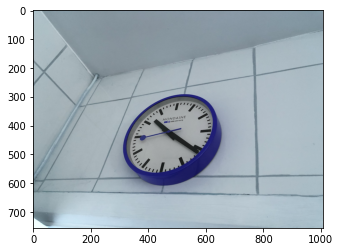

In [4]:
img = cv2.imread('clock.png')

plt.imshow(img)

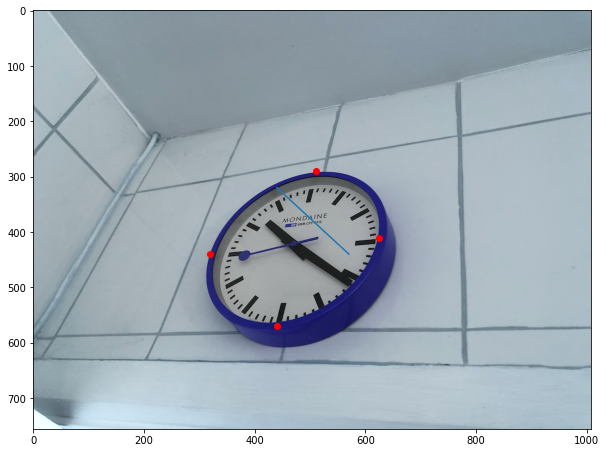

In [171]:
plt.figure(figsize=(10,10))

xp = np.array([440, 570, 410, 290])
yp = np.array([320, 440, 625, 510])

#565,450

i = np.array([0,1])

plt.imshow(img)
plt.plot(xp[i],yp[i])
plt.scatter(yp,xp, color = 'red')

puntos seleccionados

$m_1 = (450,310)$

$m_2 = (565,450)$

$m_3 = (410,625)$

$m_4 = (290,500)$

In [194]:
305/280

1.0892857142857142

In [201]:
X = cv2.imread('clock.png', 0)
(N,M) = X.shape

#centro
cx, cy = (N//2, M//2)

(w,h) = (390,290)

x = np.array([cx, cx+h, cx, cx-h]) #np.array([N//2, N, N//2,0])#np.array([20,460,20,460])
y = np.array([cy-w, cy, cy+w, cy])#np.array([0, M//2, M, M//2])#np.array([20,20,620,620])


mm = np.vstack([np.array(xp), np.array(yp), np.array([1, 1, 1, 1])])
H2 = homography_matrix((x,y),(xp,yp))

Imagen izquierda: Transformada                       | Imagen derecha: Original


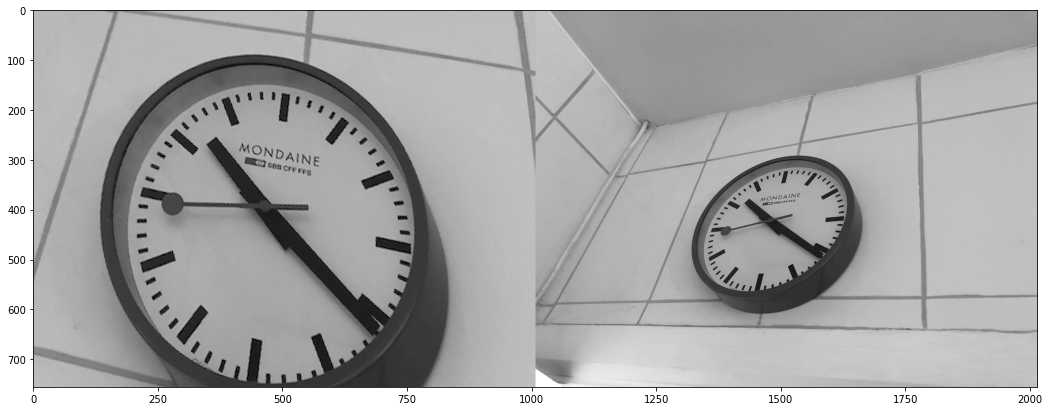

In [202]:
Hinv  = np.linalg.inv(H2)

Y = homography(X,Hinv)
Z = np.concatenate((Y,X),axis=1)

print('Imagen izquierda: Transformada                       | Imagen derecha: Original')
plt.figure(figsize=(18,24))
plt.imshow(Z,cmap='gray')
#plt.plot(x[i],y[i])
#plt.scatter(x,y,c='red')
plt.show()

# 3) Proyección en Perspectiva 3D -> 2D


Una pirámide definido como 5 puntos ${\bf p}_i$ en el sistema de coordenadas $(X_i',Y_i',Z_i')$ con los valores:

$p_1 = (0, 0, 0)$

$p_2 = (2, 0, 0)$

$p_3 = (2, 2, 0)$

$p_4 = (0, 2, 0)$

$p_5 = (1, 1, 2)$

(los primeros 4 puntos son de la base horizontal cuadrada de la pirámide, el último punto es el vértice superior)




## 3.1) Definición de coordenadas homogéneas

(1 punto)

Defina una matriz Mp de 4x5 elementos que defina los 5 puntos de la pirámide en coordenadas homogéneas en el sistema $(X_i',Y_i',Z_i')$. Es decir, los 5 puntos se deben almacenar en la variable Mp de 4x5 elementos, donde cada columna debe ser $(X'_i,Y'_i,Z'_i,1)$.


In [34]:
 # PREGUNTA 3.1: ESCRIBA CODIGO AQUI

p_1 = [0, 0, 0, 1]
p_2 = [2, 0, 0, 1]
p_3 = [2, 2, 0, 1]
p_4 = [0, 2, 0, 1]
p_5 = [1, 1, 2, 1]

Mp = np.array([p_1, p_2, p_3, p_4, p_5])

Mp = np.transpose(Mp)

Mp

array([[0, 2, 2, 0, 1],
       [0, 0, 2, 2, 1],
       [0, 0, 0, 0, 2],
       [1, 1, 1, 1, 1]])

## 3.2) Transformación 3D -> 3D 

(1 punto)

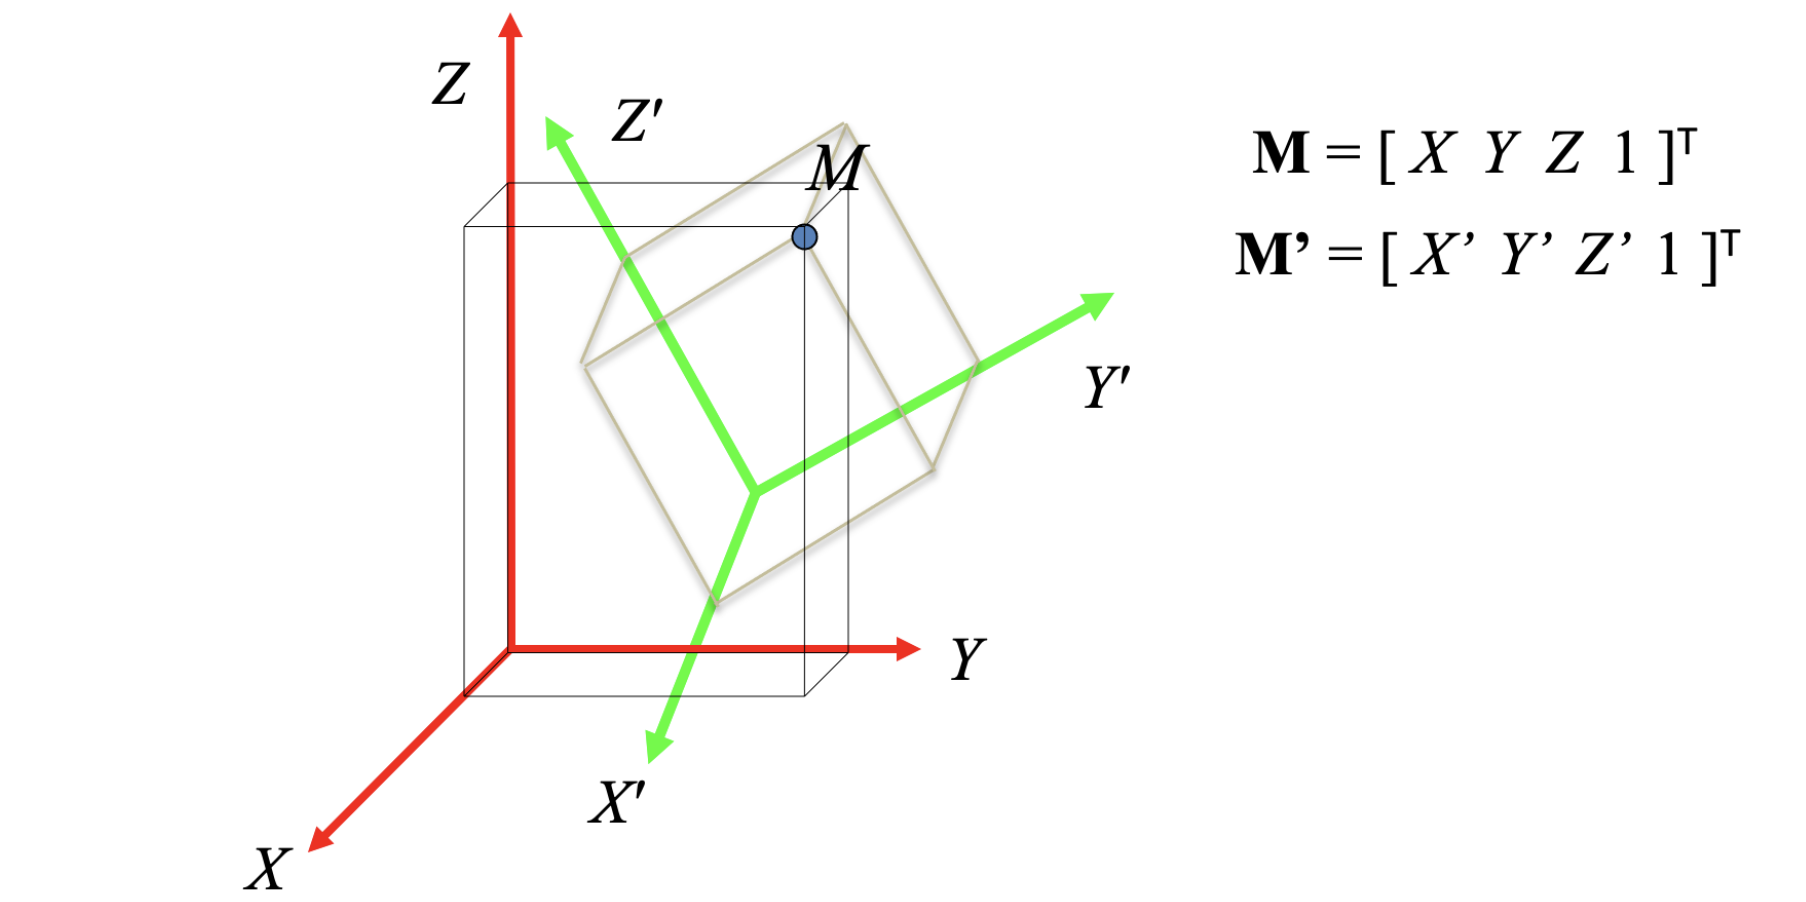

Transforme los puntos de Mp con una transformación Euclideana cuya traslación y rotación son:

* tx = 10

* ty = 20

* tz = 400

* wx = 20 grados

* wy = 30 grados

* wz = 45 grados

Esta transformación es de un sistema de coordenadas $(X',Y',Z')$ a un sistema de coordenadas $(X,Y,Z)$.

Los 5 puntos transformados se deben almacenar en la variable M de 4x5 elementos, donde cada columna debe ser $(X_i,Y_i,Z_i,1)$.



In [35]:
def rotation_matrix_3d(wx, wy, wz):
  R = np.array([
        [ np.cos(wy) * np.cos(wz), -np.cos(wy) * np.sin(wz),  np.sin(wy)],
        [ np.sin(wx) * np.sin(wy) * np.cos(wz) + np.cos(wx) * np.sin(wz),
         -np.sin(wx) * np.sin(wy) * np.sin(wz) + np.cos(wx) * np.cos(wz),
         -np.sin(wx) * np.cos(wy)],
        [-np.cos(wx) * np.sin(wy) * np.cos(wz) + np.sin(wx) * np.sin(wz),
          np.cos(wx) * np.sin(wy) * np.sin(wz) + np.sin(wx) * np.cos(wz),
          np.cos(wx) * np.cos(wy)]
  ])
  return R

In [58]:
 # PREGUNTA 3.2: ESCRIBA CODIGO AQUI

tx = 10
ty = 20
tz = 400

wx = (20/180)*np.pi
wy = (30/180)*np.pi
wz = (45/180)*np.pi

#Traslación
t = np.array([tx, ty, tz])
t = t[:, np.newaxis]

#Matriz de rotación
R = rotation_matrix_3d(wx,wy,wz)

#Transformación Euclidea H
H = np.hstack([R, t])  
H = np.vstack([H, np.array([0, 0, 0, 1])])

M = np.dot(H,Mp)
M.shape

(4, 5)

## 3.3) Transformación 3D -> 2D

(1 punto)

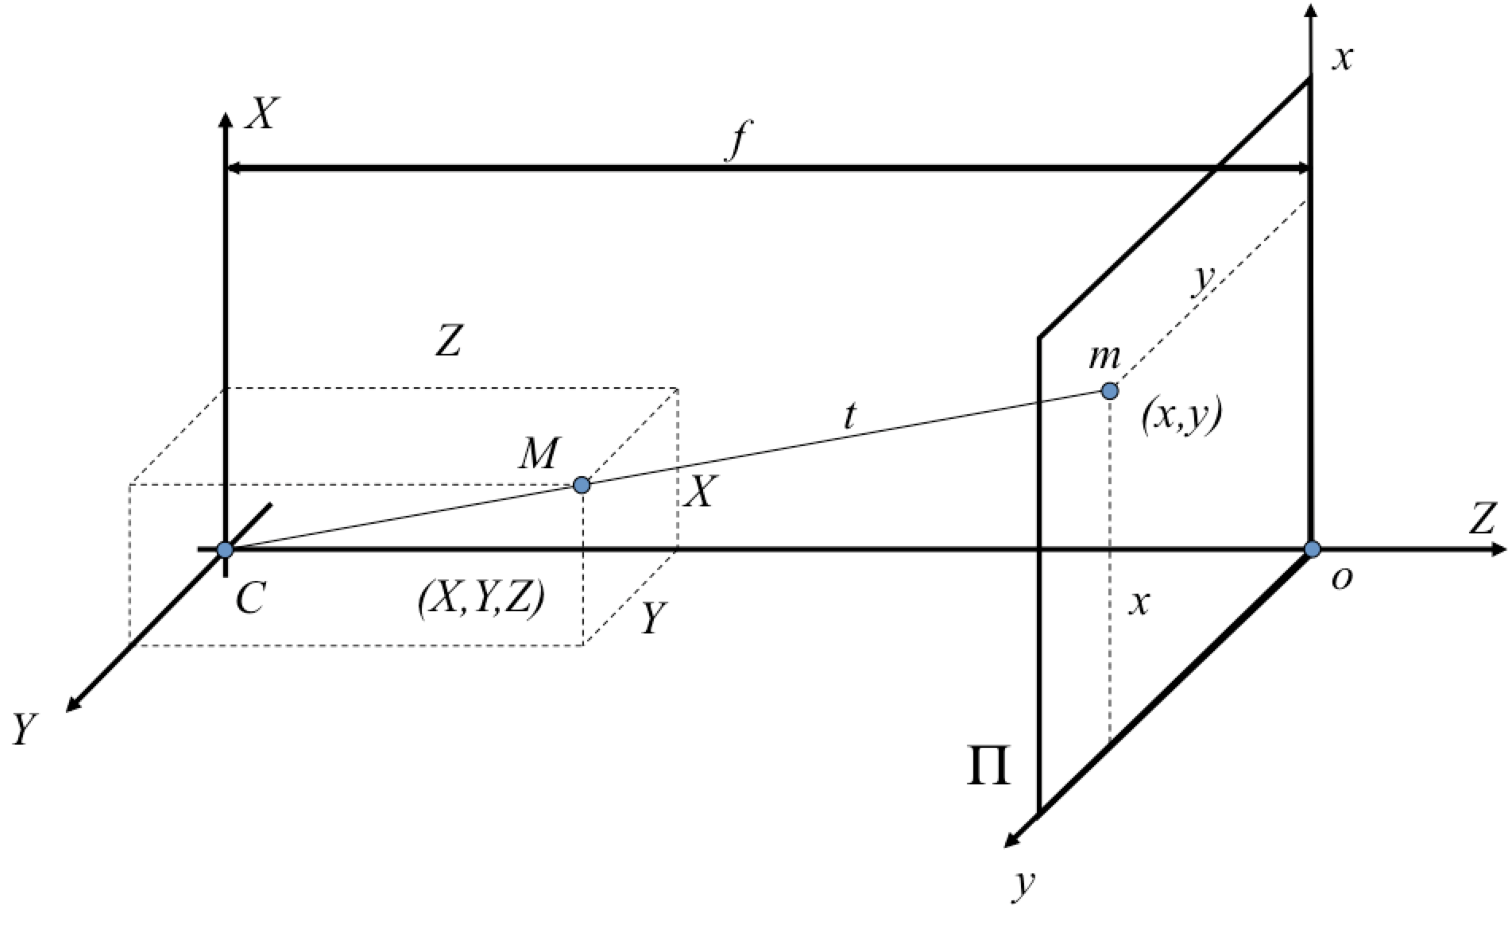

Proyecte los 5 puntos de M, que están en coordenadas $(X,Y,Z)$ a un plano de proyección $(x,y)$ que se encuentra perpendicular al eje $Z$ a una distancia focal $f = 1000$. Los 5 puntos transformados se deben almacenar en la variable m de 3x5 elementos, donde cada columna debe ser $(x_i,y_i,1)$.

In [59]:
def perspective_matrix(f):
  P = np.array([
        [f, 0, 0, 0],
        [0, f, 0, 0],
        [0, 0, 1, 0]
  ])
  return P

In [67]:
 # PREGUNTA 3.3: ESCRIBA CODIGO AQUI

f = 1000  #Distancia focal

P = perspective_matrix(f) #Matriz de perspectiva

m = np.dot(P, M)  # transformación para pasar de M a m

m = m/m[-1,:] #Dividimos por la última columna

m

array([[25.        , 28.07455002, 24.93968468, 21.87534723, 27.35561128],
       [50.        , 53.95130945, 56.50796868, 52.5668164 , 51.56913164],
       [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ]])

## 3.4) Transformación 2D -> 2D

(1 punto)

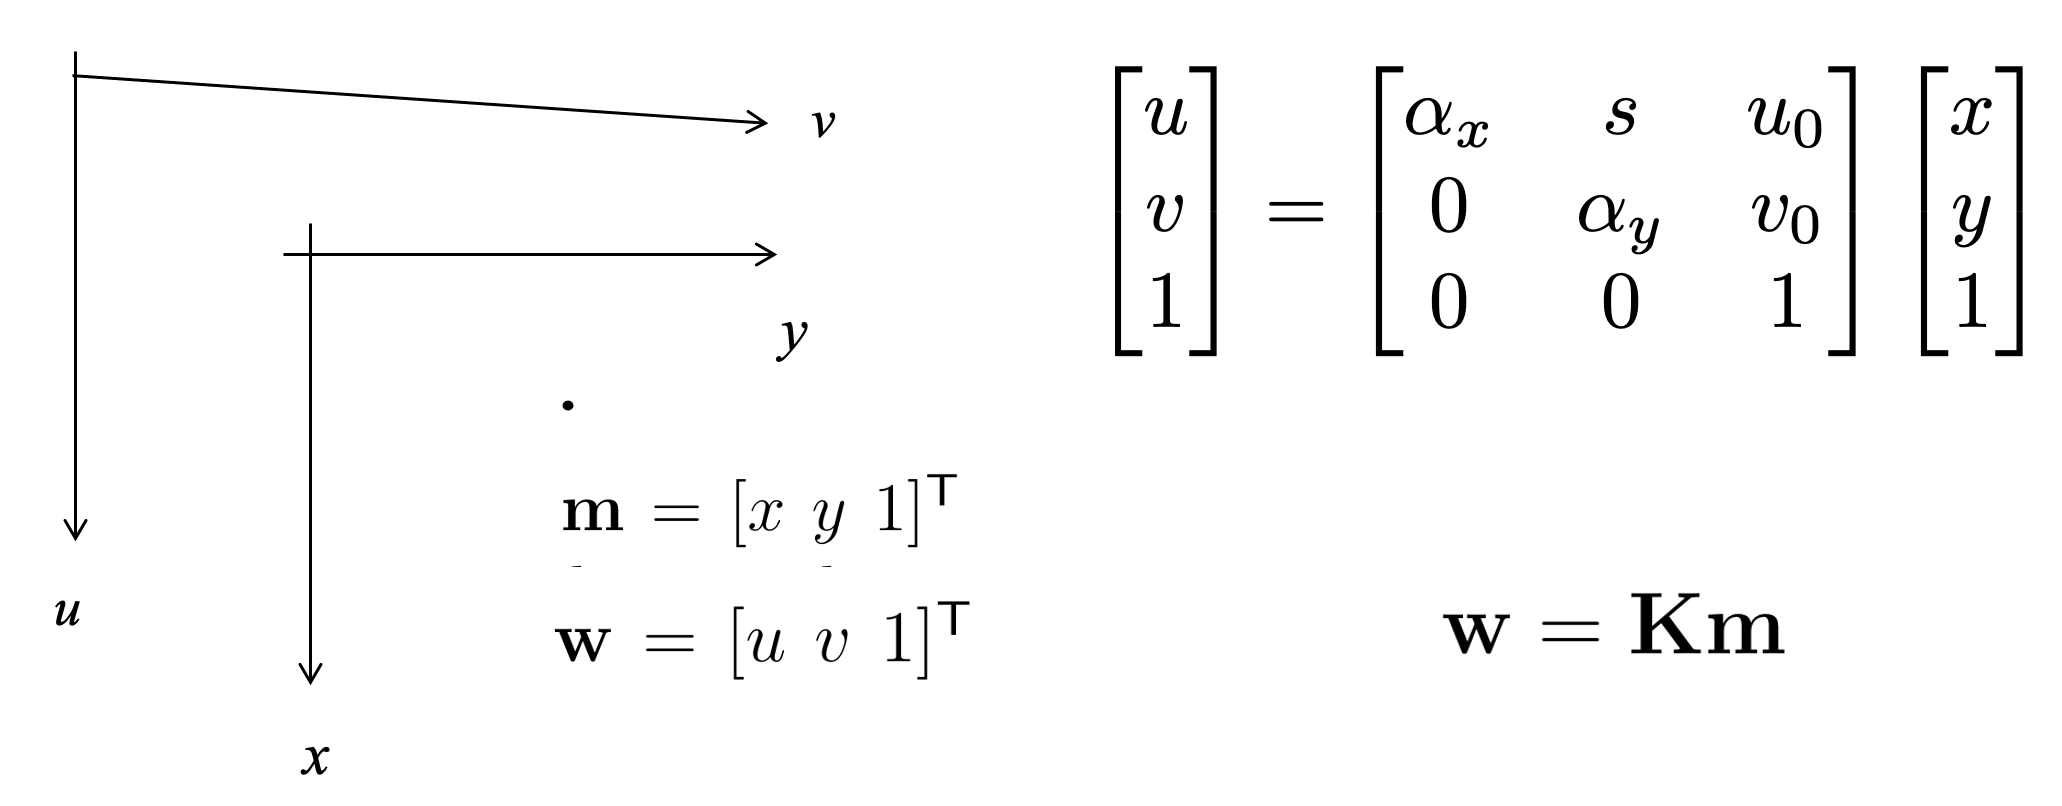



Transforme los 5 puntos del sistema de coordenas $(x,y)$ a las coordenadas de la imagen $(u,v)$ usando la ecuación ${\bf w} = {\bf Km}$ mostrada en la figura. Los elementos de ${\bf K}$ son:

* $\alpha_x = \alpha_y = 3.1$

* $s=0.05$

* $u_0 = 110$

* $v_0 = 235$

Los 5 puntos transformados se deben almacenar en la variable w de 3x5 elementos, donde cada columna debe ser $(u_i,v_i,1)$.


In [79]:
from mpl_toolkits.mplot3d.axes3d import unit_bbox
 # PREGUNTA 3.4: ESCRIBA CODIGO AQUI

(a_x , a_y) = (3.1, 3.1)
s = 0.05
u_0 = 110
v_0 = 235

K = np.array([[a_x, s, u_0],
             [0, a_y, v_0],
             [0, 0, 1]])


w = np.dot(K, m)
w

array([[190.        , 199.72867052, 190.13842094, 180.44191724,
        197.38085154],
       [390.        , 402.24905928, 410.17470291, 397.95713085,
        394.86430808],
       [  1.        ,   1.        ,   1.        ,   1.        ,
          1.        ]])

## 3.5 Transformación total 3D -> 2D

(1 punto)

Encuentre la matriz ${\bf A}$ tal que realice la transformación de $(X',Y',Z')$ a $(u,v)$, es decir que cumpla esta ecuación:

$\lambda {\bf w} = {\bf A}{\bf M}'$.

Para verificar que la matriz ${\bf A}$ esté correcta, realice la multiplicación de A por la matriz Mp y encuentre w. El resultado debe ser exactamente el mismo del paso anterior.

In [94]:
 # PREGUNTA 3.5: ESCRIBA CODIGO AQUI

A = K.dot(P).dot(H)

lam_w = B/B[-1,:]

lam_w

array([[190.        , 199.72867052, 190.13842094, 180.44191724,
        197.38085154],
       [390.        , 402.24905928, 410.17470291, 397.95713085,
        394.86430808],
       [  1.        ,   1.        ,   1.        ,   1.        ,
          1.        ]])

In [84]:
w

array([[190.        , 199.72867052, 190.13842094, 180.44191724,
        197.38085154],
       [390.        , 402.24905928, 410.17470291, 397.95713085,
        394.86430808],
       [  1.        ,   1.        ,   1.        ,   1.        ,
          1.        ]])

## 3.6) Grafica

(1 punto)

Grafique la pirámide proyecta en las coordenadas $(u,v)$. En esta gráfica deben estar tanto los vértices como las líneas que unen los vértices de la pirámide.

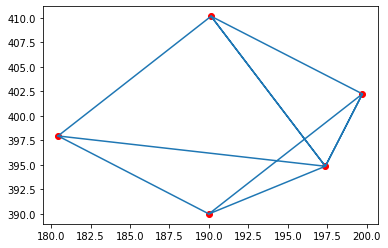

In [116]:
 # PREGUNTA 3.6: ESCRIBA CODIGO AQUI
x_i = []
y_i = []

for i in np.swapaxes(w,0,1):
  x_i.append(i[0])
  y_i.append(i[1])


i = np.array([0, 1, 2, 3, 0, 4, 1, 4, 2, 4, 3])

plt.plot(np.array(x_i)[i],np.array(y_i)[i])
plt.scatter(x_i,y_i,c='red')



# <font color='red'>SUBIR EJERCICIO DE FORMA INDIVIDUAL A CANVAS</font> 

